
Checking stationarity before differencing:
ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
⚠️ Series is NOT stationary.

Checking stationarity after first differencing:
ADF Statistic: -7.104890882267311
p-value: 4.0777865655394095e-10
✅ Series is stationary.


<Figure size 1200x400 with 0 Axes>

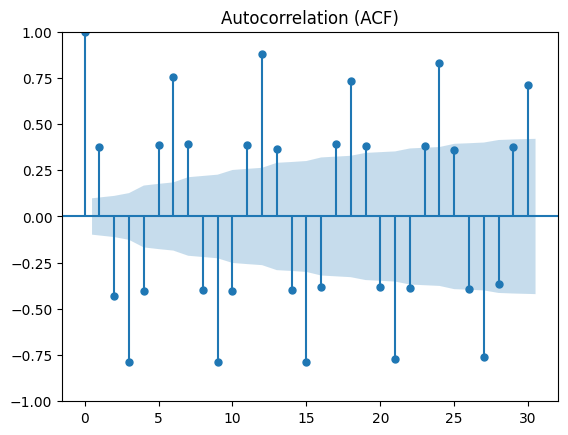

<Figure size 1200x400 with 0 Axes>

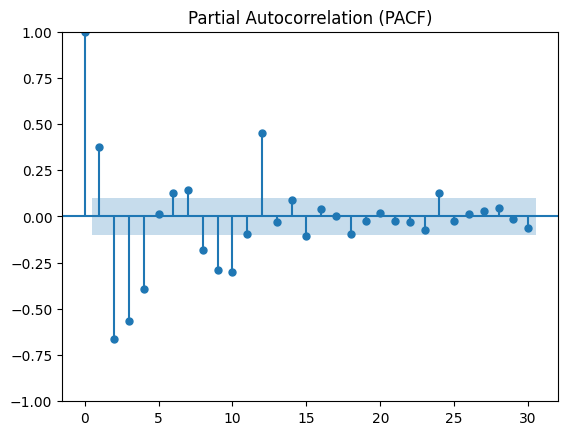

                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  397
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1308.795
Date:                Tue, 08 Apr 2025   AIC                           2623.589
Time:                        11:56:12   BIC                           2635.533
Sample:                    01-01-1985   HQIC                          2628.321
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0732      0.091      0.805      0.421      -0.105       0.251
ma.L1          0.5450      0.070      7.737      0.000       0.407       0.683
sigma2        43.4248      3.296     13.175      0.0

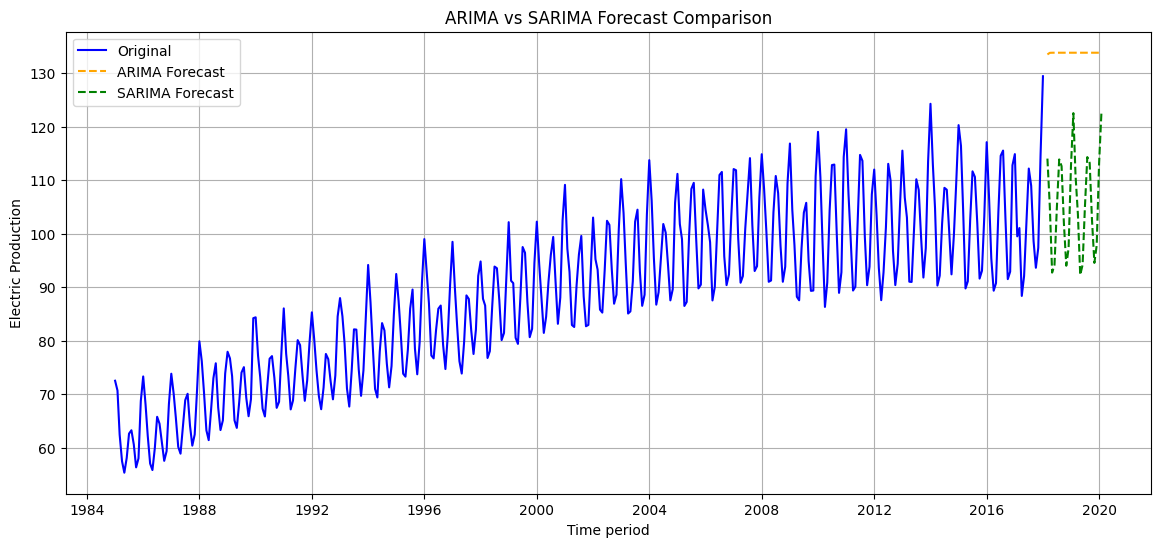

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('/content/Electric_Production.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
ts = df['IPG2211A2N']

# ======================
# 1. Check Stationarity
# ======================
def adf_test(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("✅ Series is stationary.")
    else:
        print("⚠️ Series is NOT stationary.")

print("\nChecking stationarity before differencing:")
adf_test(ts)

# First order differencing
ts_diff = ts.diff()

print("\nChecking stationarity after first differencing:")
adf_test(ts_diff)

# ======================
# 2. Plot ACF & PACF
# ======================
plt.figure(figsize=(12, 4))
plot_acf(ts_diff.dropna(), lags=30)
plt.title('Autocorrelation (ACF)')
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(ts_diff.dropna(), lags=30)
plt.title('Partial Autocorrelation (PACF)')
plt.show()

# ======================
# 3. Fit ARIMA Model (1,1,1)
# ======================
arima_model = ARIMA(ts, order=(1, 1, 1))
arima_fit = arima_model.fit()

print(arima_fit.summary())

# Forecast using ARIMA
forecast_steps = 24
arima_forecast = arima_fit.forecast(steps=forecast_steps)
arima_forecast.index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# ======================
# 4. Fit SARIMA Model (1,1,1)(1,1,1,12)
# ======================
sarima_model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Forecast using SARIMA
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)
sarima_forecast.index = arima_forecast.index  # match ARIMA forecast dates

# ======================
# 5. Plot ARIMA vs SARIMA
# ======================
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Original', color='blue')
plt.plot(arima_forecast, label='ARIMA Forecast', color='orange', linestyle='--')
plt.plot(sarima_forecast, label='SARIMA Forecast', color='green', linestyle='--')
plt.title('ARIMA vs SARIMA Forecast Comparison')
plt.xlabel('Time period')
plt.ylabel('Electric Production')
plt.legend()
plt.grid()
plt.show()
